In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [2]:
df_train = pd.read_csv('data/daisee_train_features.csv')

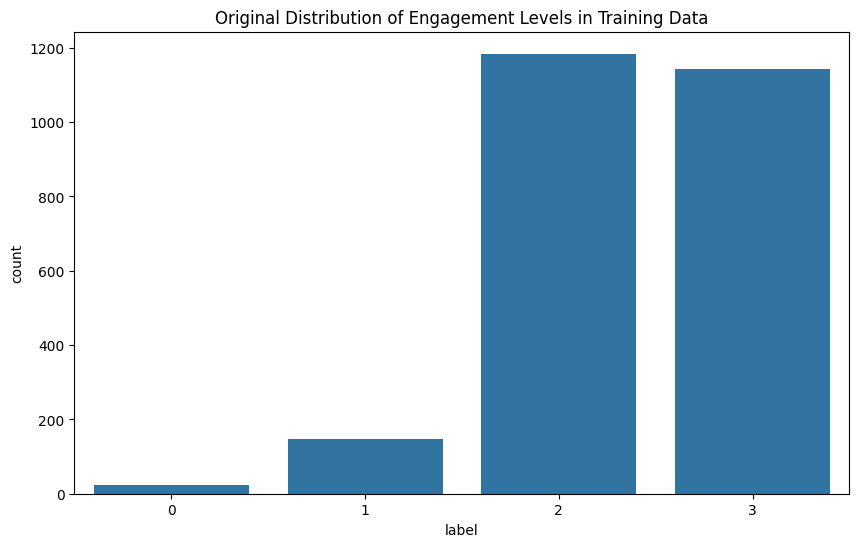

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df_train)
plt.title('Original Distribution of Engagement Levels in Training Data')
plt.show()

In [4]:
X_train = df_train.drop(['label', 'video'], axis=1)
y_train = df_train['label']

In [ ]:
over_sampler = RandomOverSampler(sampling_strategy={0: 500, 1: 800}, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

# Undersample majority classes (2 and 3)
under_sampler = RandomUnderSampler(sampling_strategy={2: 1000, 3: 1000}, random_state=42)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

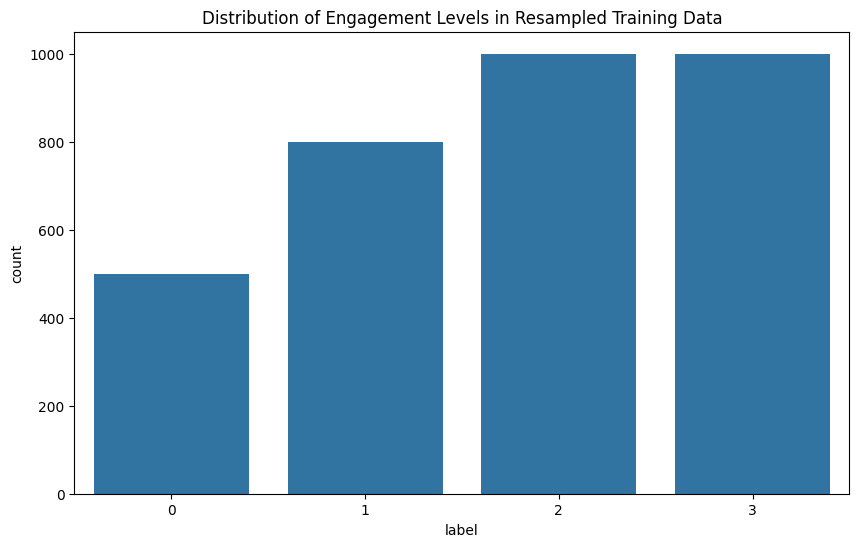

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Engagement Levels in Resampled Training Data')
plt.show()

In [7]:
joblib.dump(X_train_resampled, 'data/X_train_custom_resampled.joblib')
joblib.dump(y_train_resampled, 'data/y_train_custom_resampled.joblib')

['data/y_train_custom_resampled.joblib']